In this notebook, the the Linear Booster is used instead of a default Tree Booster.
See the documentation:
https://xgboost.readthedocs.io/en/stable/parameter.html

## Import the libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color_pal = sns.color_palette()
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
import yfinance as yf

# 1. Apple Shares

## 1.1 Import the data, create new features (previous 5 closing prices)

In [89]:
aapl = yf.Ticker('AAPL').history(period='5y').drop(['Dividends', 'Stock Splits', 'Open', 'High', 'Low', 'Volume'], axis=1)

In [90]:
aapl.head()

,Close
Date,
2018-12-12 00:00:00-05:00,40.576000
2018-12-13 00:00:00-05:00,41.019920
2018-12-14 00:00:00-05:00,39.707378
2018-12-17 00:00:00-05:00,39.337845
2018-12-18 00:00:00-05:00,39.848942


In [91]:
for lag in range(0,5):
    aapl[f'Close-{lag+1}'] = aapl['Close'].shift(lag+1)
aapl = aapl.dropna()

In [92]:
aapl.head()

,Close,Close-1,Close-2,Close-3,Close-4,Close-5
Date,,,,,,
2018-12-19 00:00:00-05:00,38.605988,39.848942,39.337845,39.707378,41.019920,40.576000
2018-12-20 00:00:00-05:00,37.631783,38.605988,39.848942,39.337845,39.707378,41.019920
2018-12-21 00:00:00-05:00,36.168064,37.631783,38.605988,39.848942,39.337845,39.707378
2018-12-24 00:00:00-05:00,35.232262,36.168064,37.631783,38.605988,39.848942,39.337845
2018-12-26 00:00:00-05:00,37.713364,35.232262,36.168064,37.631783,38.605988,39.848942


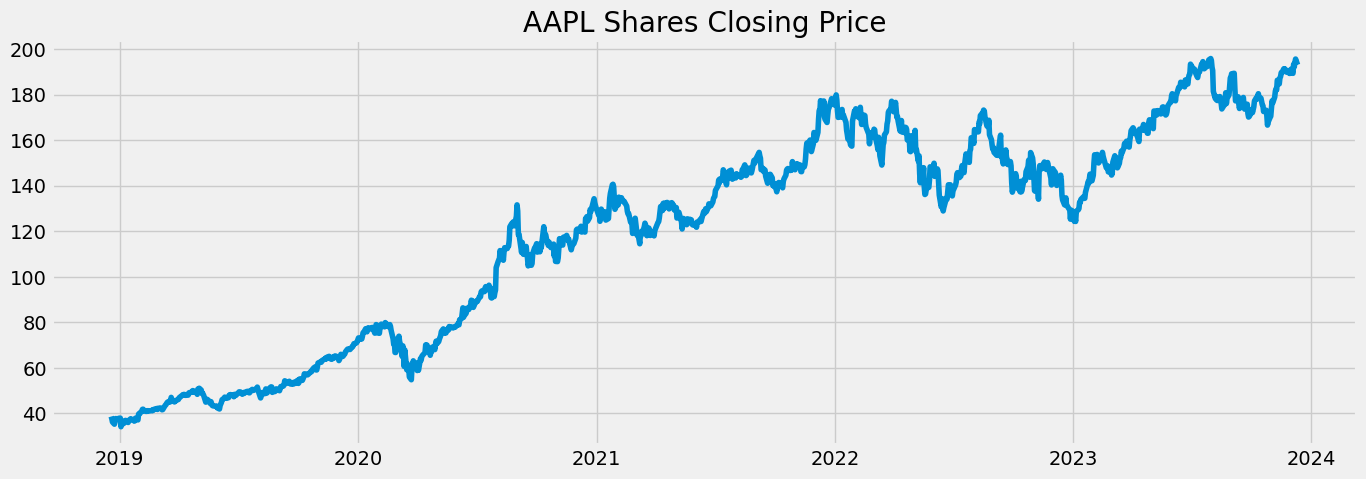

In [93]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(aapl['Close'], linestyle='-')

ax.set_title('AAPL Shares Closing Price')

plt.show()

## 1.2 Train/Test Split

In [94]:
train_aapl = aapl.loc[aapl.index < '01-01-2022'].copy()
test_aapl = aapl.loc[aapl.index >= '01-01-2022'].copy()

In [95]:
FEATURES = ['Close-1', 'Close-2', 'Close-3', 'Close-4', 'Close-5']
TARGET = ['Close']

In [96]:
X_train_aapl = train_aapl[FEATURES].copy()
y_train_aapl = train_aapl[TARGET].copy()

X_test_aapl = test_aapl[FEATURES].copy()
y_test_aapl = test_aapl[TARGET].copy()

## 1.3 Building a model

In [97]:
reg1 = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.1, booster='gblinear')

In [98]:
reg1.fit(X_train_aapl, y_train_aapl, eval_set=[(X_train_aapl, y_train_aapl), (X_test_aapl, y_test_aapl)],
        verbose=True)

[0]	validation_0-rmse:37.56459	validation_1-rmse:59.60855
[1]	validation_0-rmse:36.72074	validation_1-rmse:54.25292
[2]	validation_0-rmse:36.13509	validation_1-rmse:50.81043
[3]	validation_0-rmse:35.63069	validation_1-rmse:48.61311
[4]	validation_0-rmse:35.14023	validation_1-rmse:46.92469
[5]	validation_0-rmse:34.66096	validation_1-rmse:45.90818
[6]	validation_0-rmse:34.19018	validation_1-rmse:45.25389
[7]	validation_0-rmse:33.72202	validation_1-rmse:44.47992
[8]	validation_0-rmse:33.25657	validation_1-rmse:43.68768
[9]	validation_0-rmse:32.80237	validation_1-rmse:43.26219
[10]	validation_0-rmse:32.35649	validation_1-rmse:42.75098
[11]	validation_0-rmse:31.91735	validation_1-rmse:42.19328
[12]	validation_0-rmse:31.48572	validation_1-rmse:41.67146
[13]	validation_0-rmse:31.05678	validation_1-rmse:40.98606
[14]	validation_0-rmse:30.63321	validation_1-rmse:40.38229
[15]	validation_0-rmse:30.21791	validation_1-rmse:39.91066
[16]	validation_0-rmse:29.80239	validation_1-rmse:39.14099
[17]	va

[41]	validation_0-rmse:21.14058	validation_1-rmse:27.60196
[42]	validation_0-rmse:20.85378	validation_1-rmse:27.26225
[43]	validation_0-rmse:20.57307	validation_1-rmse:26.96753
[44]	validation_0-rmse:20.29552	validation_1-rmse:26.57768
[45]	validation_0-rmse:20.02215	validation_1-rmse:26.22288
[46]	validation_0-rmse:19.75215	validation_1-rmse:25.84609
[47]	validation_0-rmse:19.48527	validation_1-rmse:25.46351
[48]	validation_0-rmse:19.22300	validation_1-rmse:25.14295
[49]	validation_0-rmse:18.96653	validation_1-rmse:24.88058
[50]	validation_0-rmse:18.71455	validation_1-rmse:24.58664
[51]	validation_0-rmse:18.46605	validation_1-rmse:24.26054
[52]	validation_0-rmse:18.22121	validation_1-rmse:23.94068
[53]	validation_0-rmse:17.97971	validation_1-rmse:23.61529
[54]	validation_0-rmse:17.74147	validation_1-rmse:23.29459
[55]	validation_0-rmse:17.50522	validation_1-rmse:22.93266
[56]	validation_0-rmse:17.27065	validation_1-rmse:22.55387
[57]	validation_0-rmse:17.03891	validation_1-rmse:22.216

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 1.4 Results, MSE, MAPE

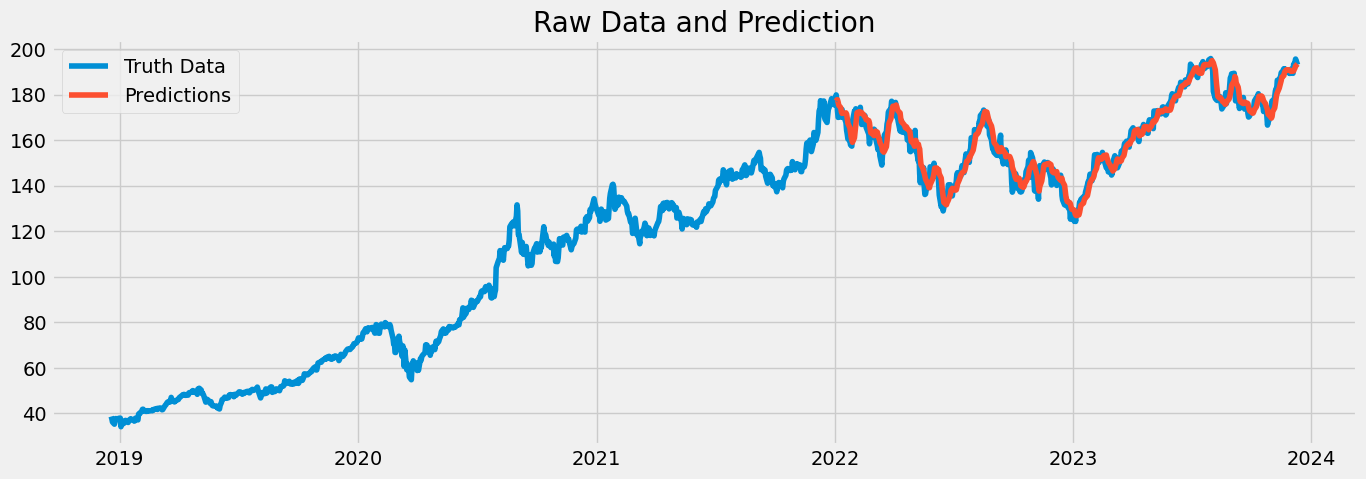

In [99]:
test_aapl['prediction'] = reg1.predict(X_test_aapl)

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(aapl['Close'], label='Truth Data')
ax.plot(test_aapl['prediction'], label='Predictions', linestyle='-')
ax.set_title('Raw Data and Prediction')
ax.legend()
plt.show()

In [100]:
aapl_true_pred = pd.concat([test_aapl['Close'], test_aapl['prediction']], axis=1)

In [101]:
aapl_true_pred

,Close,prediction
Date,,
2022-01-03 00:00:00-05:00,179.953903,177.278198
2022-01-04 00:00:00-05:00,177.669983,177.781128
2022-01-05 00:00:00-05:00,172.943985,177.811752
2022-01-06 00:00:00-05:00,170.056976,176.747665
2022-01-07 00:00:00-05:00,170.225052,175.379395
...,...,...
2023-12-05 00:00:00-05:00,193.419998,190.455292
2023-12-06 00:00:00-05:00,192.320007,191.183777
2023-12-07 00:00:00-05:00,194.270004,191.730377


In [102]:
mean_squared_error(aapl_true_pred['Close'], aapl_true_pred['prediction'])

16.322318359984386

In [104]:
mean_absolute_percentage_error(aapl_true_pred['Close'], aapl_true_pred['prediction'])

0.020500836732313087

# 2. Bitcoin Value

## 2.1 Import the data, create new features (previous 5 closing prices)

In [105]:
btc = yf.Ticker('BTC-USD').history(period='5y').drop(['Dividends', 'Stock Splits', 'Open', 'High', 'Low', 'Volume'], axis=1)

In [106]:
btc.head()

,Close
Date,
2018-12-12 00:00:00+00:00,3486.950195
2018-12-13 00:00:00+00:00,3313.677246
2018-12-14 00:00:00+00:00,3242.484863
2018-12-15 00:00:00+00:00,3236.761719
2018-12-16 00:00:00+00:00,3252.839111


In [107]:
for lag in range(0,5):
    btc[f'Close-{lag+1}'] = btc['Close'].shift(lag+1)
btc = btc.dropna()

In [108]:
btc.head()

,Close,Close-1,Close-2,Close-3,Close-4,Close-5
Date,,,,,,
2018-12-17 00:00:00+00:00,3545.864746,3252.839111,3236.761719,3242.484863,3313.677246,3486.950195
2018-12-18 00:00:00+00:00,3696.059082,3545.864746,3252.839111,3236.761719,3242.484863,3313.677246
2018-12-19 00:00:00+00:00,3745.950684,3696.059082,3545.864746,3252.839111,3236.761719,3242.484863
2018-12-20 00:00:00+00:00,4134.441406,3745.950684,3696.059082,3545.864746,3252.839111,3236.761719
2018-12-21 00:00:00+00:00,3896.543701,4134.441406,3745.950684,3696.059082,3545.864746,3252.839111


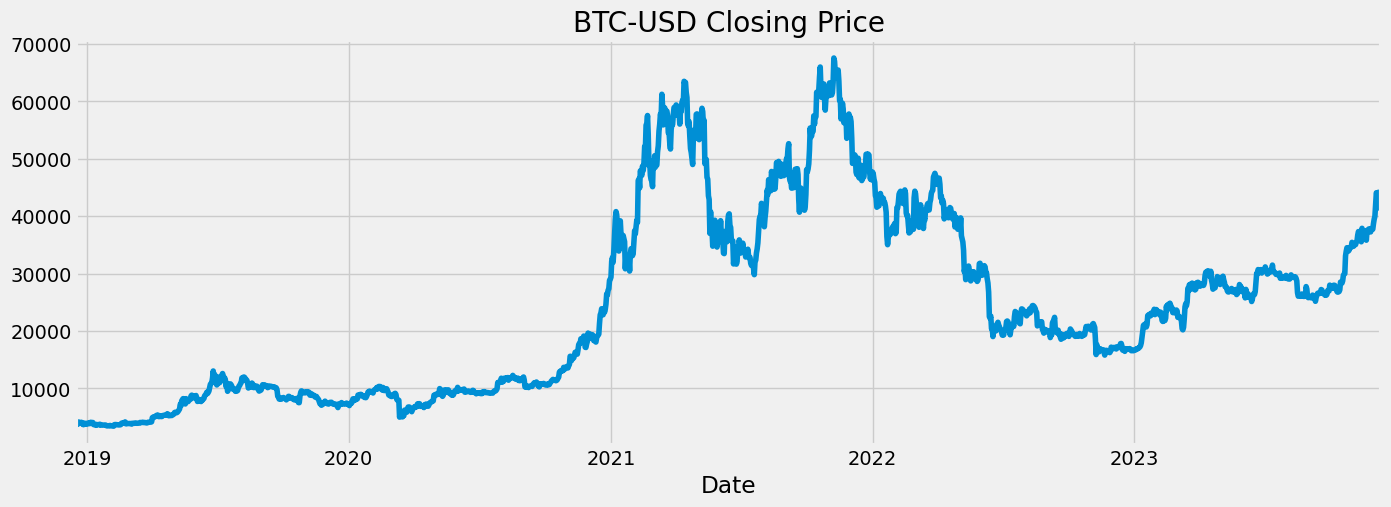

In [109]:
btc['Close'].plot(style='-', figsize=(15,5), color=color_pal[0],
        title='BTC-USD Closing Price')
plt.show()

## 2.2 Train/Test Split 

In [110]:
FEATURES = ['Close-1', 'Close-2', 'Close-3', 'Close-4', 'Close-5']
TARGET = ['Close']

In [111]:
train_btc = btc.loc[btc.index < '01-01-2022'].copy()
test_btc = btc.loc[btc.index >= '01-01-2022'].copy()

In [112]:
X_train_btc = train_btc[FEATURES].copy()
y_train_btc = train_btc[TARGET].copy()

X_test_btc = test_btc[FEATURES].copy()
y_test_btc = test_btc[TARGET].copy()

## 2.3 Building a model

In [113]:
reg2 = xgb.XGBRegressor(n_estimators=2000, early_stopping_rounds=50, learning_rate=0.5, booster='gblinear')
reg2.fit(X_train_btc, y_train_btc, eval_set=[(X_train_btc, y_train_btc), (X_test_btc, y_test_btc)],
        verbose=True)

[0]	validation_0-rmse:23732.06488	validation_1-rmse:24401.24117
[1]	validation_0-rmse:11119.52556	validation_1-rmse:7530.36562
[2]	validation_0-rmse:12918.49772	validation_1-rmse:13471.90291
[3]	validation_0-rmse:9340.44969	validation_1-rmse:7942.49948
[4]	validation_0-rmse:5988.74846	validation_1-rmse:5588.62516
[5]	validation_0-rmse:3287.37237	validation_1-rmse:1789.55924
[6]	validation_0-rmse:3232.03312	validation_1-rmse:2880.52354
[7]	validation_0-rmse:2385.95555	validation_1-rmse:1525.32043
[8]	validation_0-rmse:2188.80094	validation_1-rmse:1627.74823
[9]	validation_0-rmse:2019.94134	validation_1-rmse:1532.25748
[10]	validation_0-rmse:1925.96439	validation_1-rmse:1535.31816
[11]	validation_0-rmse:1845.21020	validation_1-rmse:1452.16005
[12]	validation_0-rmse:1811.32652	validation_1-rmse:1440.21967
[13]	validation_0-rmse:1787.94297	validation_1-rmse:1427.42760
[14]	validation_0-rmse:1773.84010	validation_1-rmse:1420.48122
[15]	validation_0-rmse:1764.49477	validation_1-rmse:1419.793

[35]	validation_0-rmse:1710.97620	validation_1-rmse:1371.40760
[36]	validation_0-rmse:1709.16192	validation_1-rmse:1369.37607
[37]	validation_0-rmse:1707.25205	validation_1-rmse:1368.47387
[38]	validation_0-rmse:1705.39617	validation_1-rmse:1367.74081
[39]	validation_0-rmse:1703.53128	validation_1-rmse:1365.78910
[40]	validation_0-rmse:1701.76993	validation_1-rmse:1364.44090
[41]	validation_0-rmse:1700.02014	validation_1-rmse:1363.32979
[42]	validation_0-rmse:1698.28577	validation_1-rmse:1360.33976
[43]	validation_0-rmse:1696.43697	validation_1-rmse:1359.18448
[44]	validation_0-rmse:1694.76014	validation_1-rmse:1358.28096
[45]	validation_0-rmse:1693.19971	validation_1-rmse:1355.22806
[46]	validation_0-rmse:1691.23961	validation_1-rmse:1355.24443
[47]	validation_0-rmse:1689.52744	validation_1-rmse:1352.76244
[48]	validation_0-rmse:1687.65898	validation_1-rmse:1352.05044
[49]	validation_0-rmse:1685.90302	validation_1-rmse:1348.90750
[50]	validation_0-rmse:1683.84622	validation_1-rmse:134

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 2.4 Results, MSE, MAPE

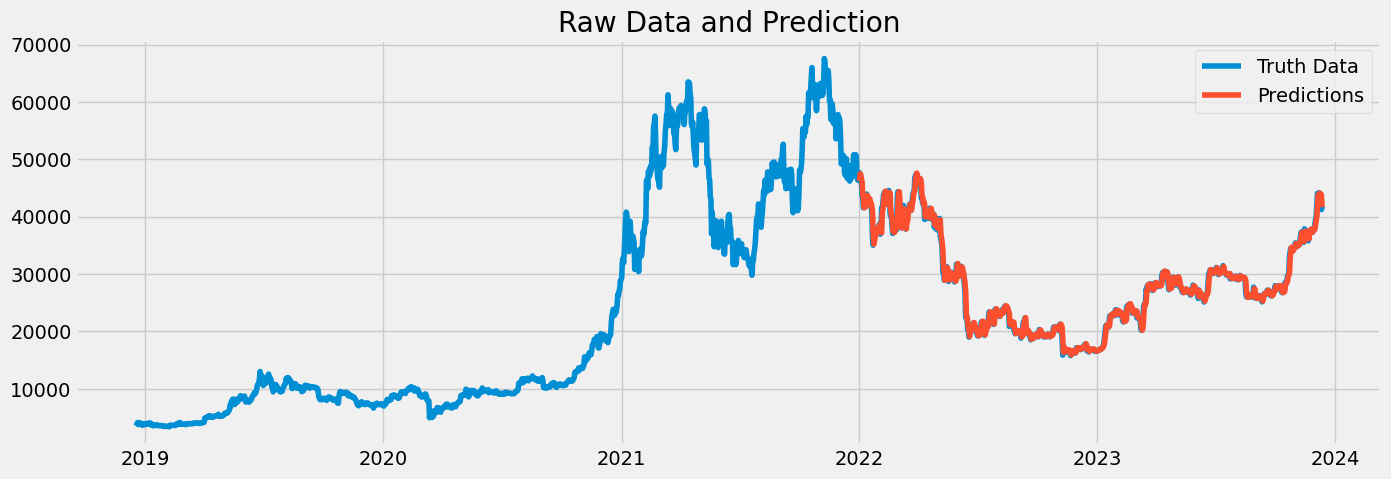

In [114]:
test_btc['prediction'] = reg2.predict(X_test_btc)

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(btc['Close'], label='Truth Data')
ax.plot(test_btc['prediction'], label='Predictions', linestyle='-')
ax.set_title('Raw Data and Prediction')
ax.legend()
plt.show()

In [115]:
btc_true_pred = pd.concat([test_btc['Close'], test_btc['prediction']], axis=1)

In [116]:
btc_true_pred

,Close,prediction
Date,,
2022-01-01 00:00:00+00:00,47686.812500,46227.507812
2022-01-02 00:00:00+00:00,47345.218750,47485.921875
2022-01-03 00:00:00+00:00,46458.117188,47343.847656
2022-01-04 00:00:00+00:00,45897.574219,46679.687500
2022-01-05 00:00:00+00:00,43569.003906,46019.781250
...,...,...
2023-12-08 00:00:00+00:00,44166.601562,43620.289062
2023-12-09 00:00:00+00:00,43725.984375,44088.031250
2023-12-10 00:00:00+00:00,43779.699219,43742.960938


In [117]:
mean_squared_error(btc_true_pred['Close'], btc_true_pred['prediction'])

751030.3135355749

In [118]:
mean_absolute_percentage_error(btc_true_pred['Close'], btc_true_pred['prediction'])

0.01940735259952548